In [58]:
import numpy as np
import pandas as pd
import glob
import sys,os

In [59]:
from PIL import Image
import cv2
import matplotlib.pyplot as plt

In [60]:
import pandas as pd

In [61]:
import json
import pickle
import re
from tqdm import tqdm
from pathlib import Path

### 0.API

In [62]:
sys.path.append('../../')
from utils.plots.plots import draw_bbox

In [6]:
# id_standard_df.to_csv('/home/chenyi/workspace/myPyModule99/dataset/labelMap/standard/id2class99_chenyi.csv', index=False)

In [7]:
id_standard_df = pd.read_csv('/home/chenyi/workspace/myPyModule99/dataset/labelMap/standard/id2class99_chenyi.csv')
id_use_df = id_standard_df[id_standard_df['use']>=0]

In [8]:
with open('/home/chenyi/workspace/myPyModule99/dataset/labelMap/standard/haowei34k_map_stand.json', 'r') as f:
    hw2stand = json.load(f)

In [34]:
def get_list2dict(k_list, v_list):
    d = {}
    for item in zip(k_list, v_list):
        d[item[0]] = item[1]
    return d

In [36]:
model_label_map = {
    0: 10,  # 鞋子
    1: 8,  # 包包
    2: 4,  # 上装
    3: 5,  # 裤子
    4: 6,  # 裙子
    5: 7,  # 连体装
}

In [37]:
# l2_map_l1 = get_list2dict( id_use_df['label99'].values, id_use_df['label_l1'].values)

In [38]:
label2model = get_list2dict( model_label_map.values(), model_label_map.keys())

### 1.Dataset Information.

In [ ]:
import numpy as np

In [43]:
# openfashion_pd.to_csv('./data/hw34k_bbox_info.csv', index=False)
openfashion_pd = pd.read_csv('./data/hw34k_bbox_info.csv')

In [ ]:
# p = '/home/chenyi/workspace/myPyModule99/data_format/haowei34k_voc_bboxes_relabel.csv'
# openfashion_pd.to_csv(p, index=False)

In [56]:
openfashion_pd.reset_index(inplace=True, drop=True)
openfashion_pd['folder'] = openfashion_pd.apply(lambda x: x, axis=1)

In [60]:
openfashion_pd['label1_chi'] = -1
openfashion_pd['label1_chi'] = openfashion_pd['label8'].map(id2eng_l1)

In [102]:
openfashion_pd['label2_eng'] = openfashion_pd['label99'].map(id2eng_l2)

In [ ]:
openfashion_pd['img_tp'] = openfashion_pd['img_sp'].apply(lambda x:)

### 画图

In [130]:
df = openfashion_pd

In [131]:
df.head(2)

,fname,label,xmin,ymin,xmax,ymax,label43,mode,width,height,label_num,label99,label8,img_sp,label1_chi,label2_eng
0,20160425101358677,正装女鞋,225,584,258,669,正装女鞋,train,533,800,23,52,10,/home/chenyi/workspace/dataset/data/haowei34k/...,shoe,Suits shoes
1,20160425101358677,正装女鞋,256,672,305,768,正装女鞋,train,533,800,23,52,10,/home/chenyi/workspace/dataset/data/haowei34k/...,shoe,Suits shoes


In [132]:
gp = dict(list(df.groupby('img_sp')))

In [133]:
gp[list(gp.keys())[0]]

,fname,label,xmin,ymin,xmax,ymax,label43,mode,width,height,label_num,label99,label8,img_sp,label1_chi,label2_eng
138108,20140304164417004,小西装,155,124,256,282,小西装,train,420,597,0,18,4,/home/chenyi/workspace/dataset/data/haowei34k/...,upperbody,suits
138109,20140304164417004,西装裤,166,268,245,524,西装裤,train,420,597,16,45,5,/home/chenyi/workspace/dataset/data/haowei34k/...,pants,Suit pants
138110,20140304164417004,正装女鞋,175,526,243,568,正装女鞋,train,420,597,23,52,10,/home/chenyi/workspace/dataset/data/haowei34k/...,shoe,Suits shoes
138111,20140304164417004,正装女鞋,158,530,220,561,正装女鞋,train,420,597,23,52,10,/home/chenyi/workspace/dataset/data/haowei34k/...,shoe,Suits shoes


In [188]:
import cv2
TROOT = '/nas/chenyi/datasets_cls/haowei34k_drawed/images/'
for k,v in tqdm(gp.items()):
    k_p = Path(k)
    img_np = cv2.imread(k)
    # img_np = cv2.cvtColor(img_np, cv2.COLOR_BGR2RGB)
    bboxes = v.loc[:, ['label2_eng', 'xmin', 'ymin', 'xmax', 'ymax']].values
    mode = v['mode'].values[0]
    tp = Path('{0}{1}/{2}/{3}'.format(TROOT, mode, np.random.randint(0,1000), k_p.name))
    for bx in bboxes:
        img_np = draw_bbox(img_np, bx, fontScale=1)
    if not tp.parent.is_dir():
        tp.parent.mkdir(exist_ok=True, parents=True)
    try:
        cv2.imwrite(str(tp),img_np)
    except:
        print('error: p')
    # break

 47%|███████████████████████████████████▎                                       | 15754/33411 [05:24<04:53, 60.10it/s]

error: p


 48%|███████████████████████████████████▉                                       | 16001/33411 [05:28<04:41, 61.87it/s]

error: p


 49%|████████████████████████████████████▍                                      | 16243/33411 [05:31<03:21, 85.10it/s]

error: p


100%|███████████████████████████████████████████████████████████████████████████| 33411/33411 [16:12<00:00, 34.36it/s]


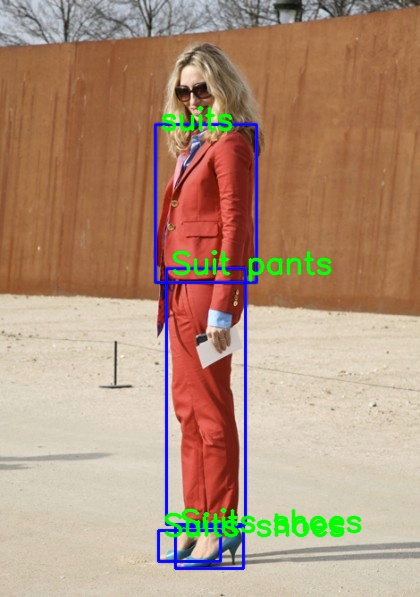

In [179]:
Image.fromarray(a)

In [48]:
slink_df = pd.read_csv('./data/hw34k_level1_slink.csv')

In [49]:
slink_df.head(2)

,fname,label_spath,label_tpath,image_tpath,image_spath
0,20160425101358677,/home/chenyi/workspace/dataset/hw_pedia_may/la...,/home/chenyi/workspace/yolov5/datasets/hw_pedi...,/home/chenyi/workspace/yolov5/datasets/hw_pedi...,/home/chenyi/workspace/dataset/data/haowei34k/...
1,20170818201332676,/home/chenyi/workspace/dataset/hw_pedia_may/la...,/home/chenyi/workspace/yolov5/datasets/hw_pedi...,/home/chenyi/workspace/yolov5/datasets/hw_pedi...,/home/chenyi/workspace/dataset/data/haowei34k/...


In [50]:
fname2path = get_list2dict(slink_df['fname'].values, slink_df['image_spath'].values)

In [53]:
openfashion_pd['img_sp'] = openfashion_pd['fname'].map(fname2path)

### 2.统计数据集

#### 二级标签

In [42]:
openfashion_pd.head(2)

NameError: name 'openfashion_pd' is not defined

In [ ]:
openfashion_pd[openfashion_pd['label8']==5].value_counts('label43')

In [ ]:
counter = openfashion_pd.value_counts('label_num').sort_index()

In [ ]:
id_list = np.array(counter.axes)[0]
numbers = counter.values
name_list = [str(x) + ':' + str(id2eng_l2[hw2stand[str(x)][0]]) for x in id_list]

In [ ]:
plt.figure(figsize=(25, 7))
plt.xticks(list(range(len(name_list))), name_list, rotation=75, fontsize=14)
plt.bar(name_list, numbers, width=0.5)  # 绘制y刻度标签
for a, b in zip(name_list, numbers):
    plt.text(a, b, b, ha='center', va='bottom')
plt.show()

#### 一级标签

In [ ]:
openfashion_pd.head()

In [ ]:
counter = openfashion_pd.value_counts('label8').sort_index()

In [ ]:
id_list = np.array(counter.axes)[0]
numbers = counter.values
name_list = [str(x) + ':' + id2eng_l1[x] for x in id_list]

In [ ]:
plt.figure(figsize=(25, 7))
plt.xticks(list(range(len(name_list))), name_list, rotation=75, fontsize=14)
plt.bar(name_list, numbers, width=0.5)  # 绘制y刻度标签
for a, b in zip(name_list, numbers):
    plt.text(a, b, b, ha='center', va='bottom')
plt.show()

#### Haowei34k_conf

In [ ]:
!ls /nas/chenyi/dataset_apparel_nas/

In [ ]:
hw_data_p = '/nas/chenyi/dataset_apparel_nas/haowei34k_conf7.csv'

In [ ]:
hw_data_df = pd.read_csv(hw_data_p)

In [ ]:
hw_data_df.head()

In [ ]:
counter_hw = hw_data_df['label_2'].value_counts()

In [ ]:
id_list = np.array(counter_hw.axes)[0]
numbers = counter_hw.values
name_list = [str(x) + ':' + names[x][1] for x in id_list]

In [ ]:
plt.figure(figsize=(25, 7))
plt.xticks(list(range(len(name_list))), name_list, rotation=50, fontsize=14)
plt.bar(name_list, numbers, width=0.5)  # 绘制y刻度标签
for a, b in zip(name_list, numbers):
    plt.text(a, b, b, ha='center', va='bottom')
plt.show()

### target label

In [11]:
!tree -d -L 2 /home/chenyi/workspace/dataset/labels/

/home/chenyi/workspace/dataset/labels/
├── dada_det
│   ├── labels100k_skirt_df2
│   ├── labels202205
│   └── labels202206
└── labels6
    ├── fashionpedia
    └── haowei34k

7 directories


In [50]:
df = pd.read_csv('./data/hw34k_bbox_info.csv')

In [51]:
len(df)

143966

In [52]:
df.head()

,fname,label,xmin,ymin,xmax,ymax,label43,mode,width,height,label_num,label99,label8,label_tpath,label_model
0,20160425101358677,正装女鞋,225,584,258,669,正装女鞋,train,533,800,23,52,10,/home/chenyi/workspace/dataset/labels/labels6/...,0
1,20160425101358677,正装女鞋,256,672,305,768,正装女鞋,train,533,800,23,52,10,/home/chenyi/workspace/dataset/labels/labels6/...,0
2,20160425101358677,连衣裙,157,136,357,468,连衣裙,train,533,800,21,47,7,/home/chenyi/workspace/dataset/labels/labels6/...,5
3,20160425101358677,包包,118,135,222,413,包,train,533,800,35,49,8,/home/chenyi/workspace/dataset/labels/labels6/...,1
4,20170818201332676,牛仔外套,447,308,745,767,牛仔外套,train,1000,1334,8,28,4,/home/chenyi/workspace/dataset/labels/labels6/...,2


In [53]:
df.value_counts('label8')

label8
10    61668
4     28089
8     20515
5     18702
6      7625
7      7367
dtype: int64

In [42]:
df = df[df['label8']>=0]

#### source label path

In [ ]:
!ls /home/chenyi/workspace/dataset/hw_pedia_true/

In [43]:
root = '/home/chenyi/workspace/dataset/labels/labels6/haowei34k/labels/'

In [44]:
df['label_tpath'] = df.apply(lambda row: Path('{0}{1}/{2}.txt'.format(root, row['mode'], row['fname'])), axis=1)

In [49]:
# df.to_csv('./data/hw34k_bbox_info.csv', index=False)

#### 生成txt

In [64]:
sys.path.append('../../')

In [65]:
from utils.bbox.conversation import bbox_coco2voc,bbox_voc2yolo,bbox_yolo2voc

In [66]:
df.head(2).values

array([[20160425101358677, '正装女鞋', 225, 584, 258, 669, '正装女鞋', 'train',
        533, 800, 23, 52, 10,
        '/home/chenyi/workspace/dataset/labels/labels6/haowei34k/labels/train/20160425101358677.txt',
        0],
       [20160425101358677, '正装女鞋', 256, 672, 305, 768, '正装女鞋', 'train',
        533, 800, 23, 52, 10,
        '/home/chenyi/workspace/dataset/labels/labels6/haowei34k/labels/train/20160425101358677.txt',
        0]], dtype=object)

In [54]:
df['label_model'] = df['label8'].map(label2model)

In [55]:
label2model

{10: 0, 8: 1, 4: 2, 5: 3, 6: 4, 7: 5}

In [56]:
df.value_counts('label_model')

label_model
0    61668
2    28089
1    20515
3    18702
4     7625
5     7367
dtype: int64

In [67]:
bboxes_list = []
for ind,row in tqdm(df.iterrows()):
    bbox7 = row.loc[['label_model', 'xmin', 'ymin', 'xmax', 'ymax', 'width', 'height']].values.tolist()
    bbox5 = bbox7[:6]
    bbox5[1:] = bbox_voc2yolo(bbox5[1:], bbox7[5], bbox7[6])
    bbox5_str = '{0:.0f} {1:.6f} {2:.6f} {3:.6f} {4:.6f}\n'.format(*bbox5)
    bboxes_list.append(bbox5_str)
    # break

143966it [00:32, 4436.27it/s]


In [75]:
bboxes_list[-1]

'0 0.680000 0.932155 0.072727 0.126568\n'

In [74]:
def write_txt(label_path, text):
    # label_path, text = input_list[0], input_list[1]
    label_path = Path(label_path)
    p_parent = label_path.parent
    if not p_parent.is_dir():
        p_parent.mkdir(parents=True)
    if not p_parent.is_file():
        with open(label_path, 'a+') as f:
            f.write(text)

In [75]:
import shutil
if Path(df['label_tpath'].values[0]).parents[1].is_dir():
    shutil.rmtree(Path(df['label_tpath'].values[0]).parents[1])

In [76]:
for label_path, text in tqdm(zip(df['label_tpath'].values, bboxes_list)):
    write_txt(label_path, text)
    # break

143966it [00:03, 38933.51it/s]


In [77]:
label_path,text

('/home/chenyi/workspace/dataset/labels/labels6/haowei34k/labels/train/20150327124301904.txt',
 '0 0.680000 0.932155 0.072727 0.126568\n')

In [78]:
!cat $label_path

2 0.476364 0.355758 0.360000 0.312429
3 0.517273 0.654504 0.376364 0.410490
0 0.515455 0.854048 0.067273 0.111745
0 0.680000 0.932155 0.072727 0.126568


#### 生成软连接的path

In [ ]:
!tree -d L 2 /home/chenyi/workspace/dataset/data/haowei34k/images/

In [ ]:
!tree -d L 2 /home/chenyi/workspace/yolov5/datasets/hw_pedia_may/

In [ ]:
# !mkdir -p /home/chenyi/workspace/yolov5/datasets/hw_pedia_may/labels/train

In [ ]:
drop_df = df.drop_duplicates('label_tpath')

In [ ]:
slink_df = pd.DataFrame()
slink_df['fname'] = drop_df['fname']
slink_df['label_spath'] = drop_df['label_tpath']

In [ ]:
root = Path('/home/chenyi/workspace/yolov5/datasets/hw_pedia_true/')
data_root = Path('/home/chenyi/workspace/dataset/data/haowei34k/')

In [ ]:
slink_df['label_tpath'] = slink_df['label_spath'].apply(lambda x: root /'labels' /x.parts[-2]/x.parts[-1])

In [ ]:
slink_df['image_tpath'] = slink_df['label_spath'].apply(lambda x: root /'images' /x.parts[-2]/x.parts[-1])
slink_df['image_tpath'] = slink_df['image_tpath'].apply(lambda x: x.with_suffix('.jpg'))

In [ ]:
slink_df['image_spath'] = slink_df['image_tpath'].apply(lambda x: troot /'images' /x.parts[-2]/x.parts[-1])

#### 直接读取slink.csv

In [45]:
slink_df = pd.read_csv('./data/hw34k_level1_slink.csv')

In [46]:
slink_df.head(2).values

array([[20140304164417004,
        '/home/chenyi/workspace/dataset/labels/labels6/haowei34k/train/20140305224000604.txt',
        '/home/chenyi/workspace/yolov5/datasets/dadet100kv1/labels/train/20140304164417004.txt',
        '/home/chenyi/workspace/yolov5/datasets/dadet100kv1/images/train/20140304164417004.jpg',
        '/home/chenyi/workspace/dataset/data/haowei34k/images/train/20140304164417004.jpg'],
       [20140304164758156, nan,
        '/home/chenyi/workspace/yolov5/datasets/dadet100kv1/labels/train/20140304164758156.txt',
        '/home/chenyi/workspace/yolov5/datasets/dadet100kv1/images/train/20140304164758156.jpg',
        '/home/chenyi/workspace/dataset/data/haowei34k/images/train/20140304164758156.jpg']],
      dtype=object)

In [47]:
slink_df.head(2)

,fname,label_sp,label_tp,img_tp,img_sp
0,20140304164417004,/home/chenyi/workspace/dataset/labels/labels6/...,/home/chenyi/workspace/yolov5/datasets/dadet10...,/home/chenyi/workspace/yolov5/datasets/dadet10...,/home/chenyi/workspace/dataset/data/haowei34k/...
1,20140304164758156,NaN,/home/chenyi/workspace/yolov5/datasets/dadet10...,/home/chenyi/workspace/yolov5/datasets/dadet10...,/home/chenyi/workspace/dataset/data/haowei34k/...


##### 新的label target path.

In [48]:
slink_df.sort_values('fname', inplace=True)

In [49]:
img_df = df.drop_duplicates('fname').sort_values('fname')

In [50]:
len(df), len(img_df), len(slink_df)

(144122, 33411, 33411)

In [51]:
slink_df.tail(2)

,fname,label_sp,label_tp,img_tp,img_sp
33409,20180617174219135,NaN,/home/chenyi/workspace/yolov5/datasets/dadet10...,/home/chenyi/workspace/yolov5/datasets/dadet10...,/home/chenyi/workspace/dataset/data/haowei34k/...
33410,20180618054151807,/home/chenyi/workspace/dataset/labels/labels6/...,/home/chenyi/workspace/yolov5/datasets/dadet10...,/home/chenyi/workspace/yolov5/datasets/dadet10...,/home/chenyi/workspace/dataset/data/haowei34k/...


In [52]:
img_df.tail(2)

,fname,label,xmin,ymin,xmax,ymax,label43,mode,width,height,label_num,label99,label8,label_tpath
141196,20180617174219135,连衣裙,144,125,313,356,连衣裙,train,420,630,21,47,7,/home/chenyi/workspace/dataset/labels/labels6/...
138314,20180618054151807,毛衣/绒衣/针织衫,201,155,413,433,毛衣/绒衣/针织衫,train,600,900,1,19,4,/home/chenyi/workspace/dataset/labels/labels6/...


In [53]:
slink_df['label_sp'] = img_df['label_tpath'].values

##### 生成label_tp, img_sp, img_tp

In [89]:
slink_df.tail(2).values

array([[20180617174219135,
        PosixPath('/home/chenyi/workspace/dataset/labels/labels6/haowei34k/labels/train/20180617174219135.txt'),
        '/home/chenyi/workspace/yolov5/datasets/dadet100kv2/labels/train/20180617174219135.txt',
        '/home/chenyi/workspace/yolov5/datasets/dadet100kv2/images/train/20180617174219135.jpg',
        '/home/chenyi/workspace/dataset/data/haowei34k/images/train/20180617174219135.jpg'],
       [20180618054151807,
        PosixPath('/home/chenyi/workspace/dataset/labels/labels6/haowei34k/labels/train/20180618054151807.txt'),
        '/home/chenyi/workspace/yolov5/datasets/dadet100kv2/labels/train/20180618054151807.txt',
        '/home/chenyi/workspace/yolov5/datasets/dadet100kv2/images/train/20180618054151807.jpg',
        '/home/chenyi/workspace/dataset/data/haowei34k/images/train/20180618054151807.jpg']],
      dtype=object)

In [86]:
origin_folder = 'dadet100kv1'
folder_name = 'dadet100kv2'

In [87]:
slink_df['img_tp'] = slink_df['img_tp'].apply(lambda x:x.replace(f'/datasets/{origin_folder}/images/', f'/datasets/{folder_name}/images/'))
slink_df['label_tp'] = slink_df['label_tp'].apply(lambda x:x.replace(f'/datasets/{origin_folder}/labels/', f'/datasets/{folder_name}/labels/'))

In [88]:
# slink_df.to_csv('./data/hw34k_level1_slink.csv', index=False)

#### 生成sym link

In [84]:
folder_name = 'dadet100kv2'
root = f'/home/chenyi/workspace/yolov5/datasets/{folder_name}'
!tree  -d -L 2 $root

/home/chenyi/workspace/yolov5/datasets/dadet100kv2
├── images
│   ├── train
│   └── val
└── labels
    ├── train
    └── val

6 directories


In [90]:
slink_df.head(2)

,fname,label_sp,label_tp,img_tp,img_sp
0,20140304164417004,/home/chenyi/workspace/dataset/labels/labels6/...,/home/chenyi/workspace/yolov5/datasets/dadet10...,/home/chenyi/workspace/yolov5/datasets/dadet10...,/home/chenyi/workspace/dataset/data/haowei34k/...
1,20140304164758156,/home/chenyi/workspace/dataset/labels/labels6/...,/home/chenyi/workspace/yolov5/datasets/dadet10...,/home/chenyi/workspace/yolov5/datasets/dadet10...,/home/chenyi/workspace/dataset/data/haowei34k/...


In [98]:
len(glob.glob(f'{root}/images/*/*.jpg')), len(glob.glob(f'{root}/labels/*/*.txt'))

(97994, 64583)

In [93]:
%%time
for p in slink_df['img_tp'].values:
    if Path(p).is_symlink():
        Path(p).unlink()
_ = slink_df.apply(lambda row: Path.symlink_to(Path(row['img_tp']), Path(row['img_sp'])), axis=1)

CPU times: user 935 ms, sys: 718 ms, total: 1.65 s
Wall time: 1.74 s


In [99]:
%%time
for p in slink_df['label_tp'].values:
    if Path(p).is_symlink():
        Path(p).unlink()
_ = slink_df.apply(lambda row: Path.symlink_to(Path(row['label_tp']), Path(row['label_sp'])), axis=1)

CPU times: user 810 ms, sys: 559 ms, total: 1.37 s
Wall time: 1.41 s


In [100]:
len(glob.glob(f'{root}/images/*/*.jpg')), len(glob.glob(f'{root}/labels/*/*.txt'))

(97994, 97994)

In [102]:
p = str(slink_df['label_tp'][0])
!cat $p

2 0.489286 0.340034 0.240476 0.264657
3 0.489286 0.663317 0.188095 0.428811
0 0.497619 0.916248 0.161905 0.070352
0 0.450000 0.913735 0.147619 0.051926


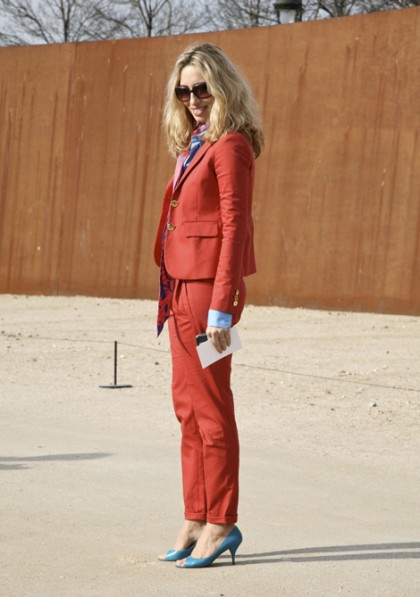

In [105]:
Image.open(slink_df['img_tp'][0])

#### 核查软连接

In [8]:
import glob,cv2, os
import pandas as pd

In [20]:
!tree  -d -L 1 /home/chenyi/workspace/yolov5/datasets/

/home/chenyi/workspace/yolov5/datasets/
├── coco128
├── dadet100kv2
├── deepedia
├── deepedia6_shbg
├── deepedia_catg6
├── deepedia_catg8
├── deepedia_catg9
├── haowei_bag_shoe
├── hwpedia80k
├── tuneGallery10k
├── tuneGallery4k
├── tuneQuery10k
└── validation_all

13 directories


In [79]:
folder_name = 'dadet100kv2'
root = f'/home/chenyi/workspace/yolov5/datasets/{folder_name}'
!tree  -d -L 2 $root

/home/chenyi/workspace/yolov5/datasets/dadet100kv2
├── images
│   ├── train
│   └── val
└── labels
    ├── train
    └── val

6 directories


In [80]:
def check_syslink(root, mode='images'):
    subfix = '.txt' if mode=='labels' else '.jpg'
    flag_list = [os.path.isfile(os.readlink(p)) for p in glob.glob(f'{root}/{mode}/*/*{subfix}')]
    txt_df = pd.DataFrame()
    txt_df['flag'] = flag_list
    return txt_df.value_counts('flag')

In [23]:
root

'/home/chenyi/workspace/yolov5/datasets/hwpedia80k'

In [24]:
%%time
check_syslink(root, mode='images')

CPU times: user 229 ms, sys: 610 ms, total: 839 ms
Wall time: 6.37 s


flag
True    78940
dtype: int64

In [81]:
%%time
check_syslink(root, mode='labels')

CPU times: user 207 ms, sys: 471 ms, total: 678 ms
Wall time: 4.15 s


flag
True    97994
dtype: int64